In [1]:
import pandas as pd

# Load the processed data
data = pd.read_csv("../data/processed/diabetes_scaled.csv")

# Split features and target
X = data.drop("target", axis=1)
y = data["target"]

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


In [2]:
# Example: Capping outliers to 1.5 times the IQR
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)


In [3]:
# Drop one of the highly correlated features
X = X.drop("s2", axis=1)


In [4]:
# Example: Add a squared term for BMI
X["bmi_squared"] = X["bmi"] ** 2

# Example: Add an interaction term for BMI and blood pressure
X["bmi_bp"] = X["bmi"] * X["bp"]


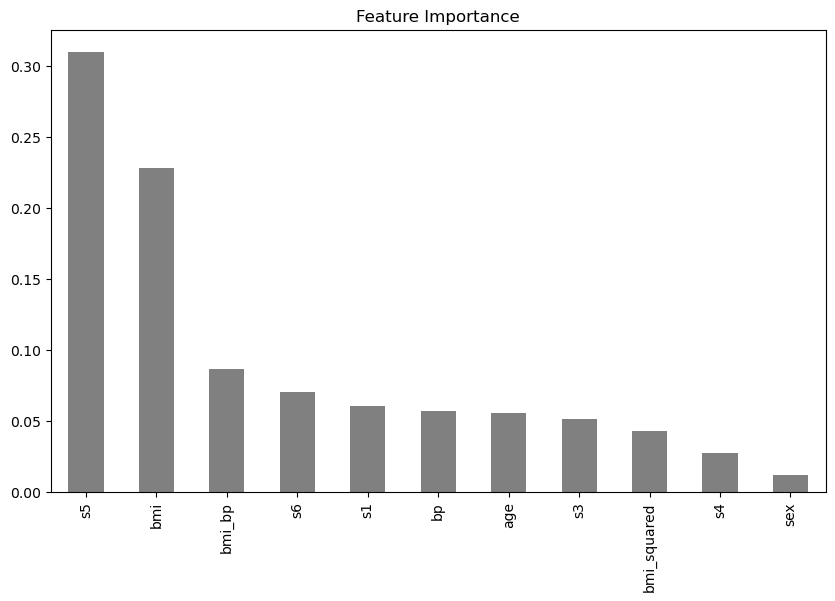

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest to evaluate feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Plot feature importances
import matplotlib.pyplot as plt
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), color="gray")
plt.title("Feature Importance")
plt.show()


In [6]:
# Combine X (features) and y (target)
enhanced_data = pd.concat([X, y], axis=1)

# Save to processed folder
enhanced_path = "../data/processed/diabetes_enhanced.csv"
enhanced_data.to_csv(enhanced_path, index=False)
print(f"Enhanced data saved to {enhanced_path}")


Enhanced data saved to ../data/processed/diabetes_enhanced.csv
